**Objectives**
* EDA and Visualization

<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
sns.set_palette('pastel')

In [2]:
data = pd.read_csv('insurance-data.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
<h3>Helper Functions</h3>

In [4]:
# This Function for Plot PIE Chart only
def pie(x = 'smoker', data = data, title = None):
    if not title:
        title = x;
    values = data.groupby(x).size().values.tolist()
    index = data.groupby(x).size().index.tolist()
    def func(pct):
        # percentage = int(pct / 100 * np.sum(values))
        return "{:.1f}%".format(pct)
    plt.figure(figsize=(20, 5))
    plt.pie(values, autopct = lambda pct: func(pct))
    plt.legend(index, title = 'Index')
    plt.title(f"{title} Pie Chart")

In [5]:
# This function for make summary for Numeric Features
def summarize(feature):
    mn = data[feature].min()
    mx = data[feature].max()
    q1 = data[feature].quantile(0.25)
    q2 = data[feature].quantile(0.50)
    q3 = data[feature].quantile(0.75)
    mean = data[feature].mean()
    std = data[feature].std()
    print(f"Min Value: {mn}\nMax Value: {mx}\nQ1: {q1}\nQ2: {q2}\nQ3: {q3}\nMean: {mean}\nSTD: {std}")

----

In [6]:
# Statistical Summery for our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation**
* There is no Null Data in this dataset
* There is 7 feature 4 Numeric and 3 Object (String)

-----

**Feature Engineering**
* BMI between 18.5 and 24.9 Consider as `Normal`
* Less 18.5 and greater that 24.9 Consider `Upnormal`

**Weight Status**
* `18.5` and below **Underweight**
* `18.5` - `24.9` **Healthy Weight**
* `25.0` - `29.9` **Overweight**
* `30 and above` **Obesity** 

In [8]:
# Let's make a New Feature that describe the bmi is normal or upnormal 
data['Weight'] = ((data['bmi'] < 18.5) | (data['bmi'] > 24.9)).map({True: 'UpNormal', False: 'Normal'})

In [9]:
# Let's make a new feature that describe each BMI is [Underweight, Healthy Weight, Overweight, Obesity]
def convert_value(x):
    if x >= 30:
        return 'Obesity'
    elif x >= 25:
        return 'Overweight'
    elif x >= 18.5:
        return 'Healthy Weight'
    else:
        return 'Underweight'
data['WeightStatus'] = data['bmi'].map(lambda x: convert_value(x))

In [10]:
data['Weight'].unique()

array(['UpNormal', 'Normal'], dtype=object)

In [11]:
data['WeightStatus'].unique()

array(['Overweight', 'Obesity', 'Healthy Weight', 'Underweight'],
      dtype=object)

In [12]:
data

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
0,19,female,27.900,0,yes,southwest,16884.92400,UpNormal,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,UpNormal,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,UpNormal,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,UpNormal,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,UpNormal,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,UpNormal,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,UpNormal,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,UpNormal,Overweight


<h1>EDA For Categorical Data</h1>

<h3>Weight</h3>

<AxesSubplot:xlabel='Weight', ylabel='count'>

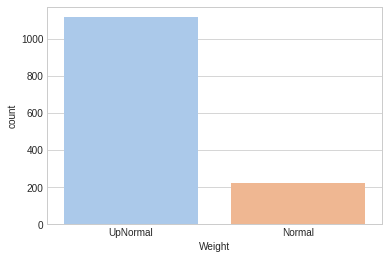

In [13]:
sns.countplot(x = data['Weight'])

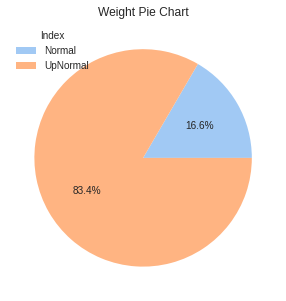

In [14]:
pie('Weight')

<AxesSubplot:xlabel='Weight', ylabel='charges'>

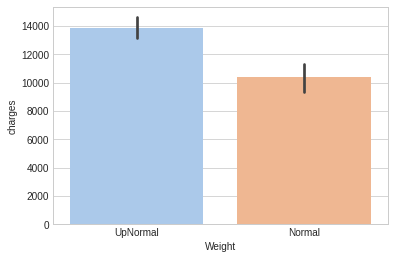

In [15]:
sns.barplot(x = 'Weight', y = 'charges', data = data)

<AxesSubplot:xlabel='Weight', ylabel='count'>

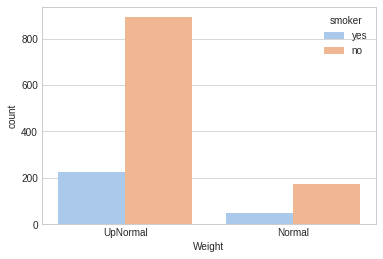

In [16]:
sns.countplot(x = data['Weight'], hue = data['smoker'])

<AxesSubplot:xlabel='Weight', ylabel='children'>

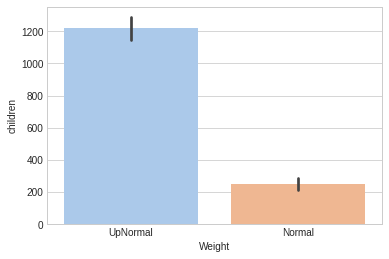

In [17]:
sns.barplot(x = data['Weight'], y = data['children'], estimator=np.sum)

<AxesSubplot:xlabel='Weight', ylabel='count'>

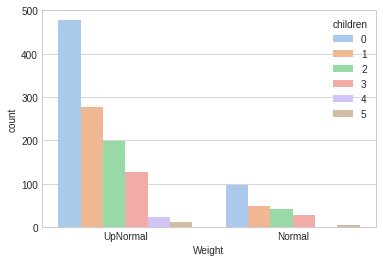

In [18]:
sns.countplot(x = data['Weight'], hue = data['children'])

In [19]:
data['children'].groupby(data['Weight']).sum()

Weight
Normal       248
UpNormal    1217
Name: children, dtype: int64

**Observation**
* Number of UpNormal people is larger than normal people
* `83.4%` Up Normal in dataset
* UpNormal People Charges is **greater** than Normal
* UpNormal People has `83%` children but Normal people has `17%`

-----
<h3>Weight Status</h3>

<AxesSubplot:xlabel='WeightStatus', ylabel='count'>

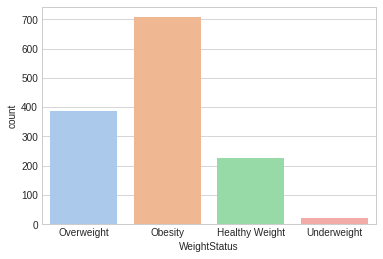

In [20]:
sns.countplot(x = data['WeightStatus'])

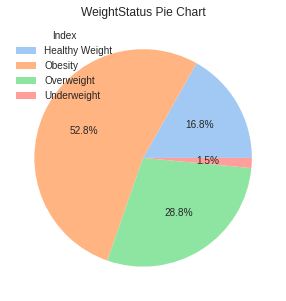

In [21]:
pie('WeightStatus')

<AxesSubplot:xlabel='smoker', ylabel='count'>

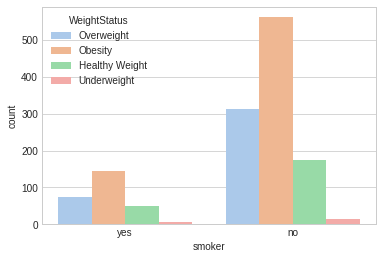

In [22]:
sns.countplot(x = data['smoker'], hue = data['WeightStatus'])

In [23]:
data.groupby(['smoker', 'WeightStatus']).count()['age'].to_frame(name='Count')

Count
smoker WeightStatus         
no     Healthy Weight    175
       Obesity           562
       Overweight        312
       Underweight        15
yes    Healthy Weight     50
       Obesity           145
       Overweight         74
       Underweight         5

<AxesSubplot:xlabel='WeightStatus', ylabel='count'>

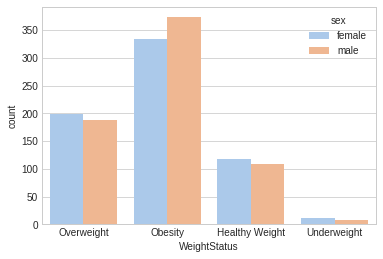

In [24]:
sns.countplot(x = data['WeightStatus'], hue = data['sex'])

<AxesSubplot:xlabel='region', ylabel='count'>

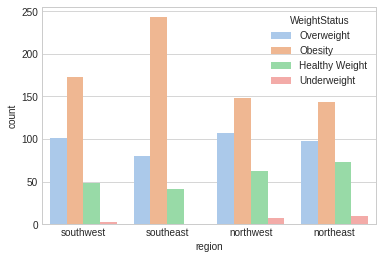

In [25]:
sns.countplot(x = data['region'], hue = data['WeightStatus'])

In [26]:
data.groupby([data['region'],data['WeightStatus']]).agg('count')['age'].to_frame(name='Count')

Count
region    WeightStatus         
northeast Healthy Weight     73
          Obesity           143
          Overweight         98
          Underweight        10
northwest Healthy Weight     63
          Obesity           148
          Overweight        107
          Underweight         7
southeast Healthy Weight     41
          Obesity           243
          Overweight         80
southwest Healthy Weight     48
          Obesity           173
          Overweight        101
          Underweight         3

<AxesSubplot:xlabel='WeightStatus', ylabel='charges'>

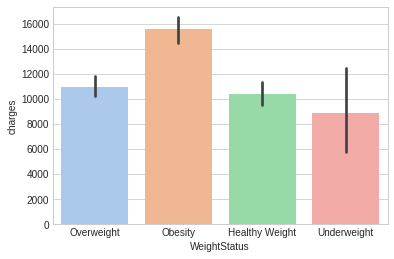

In [27]:
sns.barplot(x = data['WeightStatus'], y = data['charges'], estimator = np.mean)

In [28]:
frame = data['charges'].groupby(data['WeightStatus']).mean().to_frame(name='Avg. Charges').sort_values(by=['Avg. Charges'], ascending=False)
frame

,Avg. Charges
WeightStatus,
Obesity,15552.335469
Overweight,10987.509891
Healthy Weight,10409.337709
Underweight,8852.200585


<AxesSubplot:ylabel='WeightStatus'>

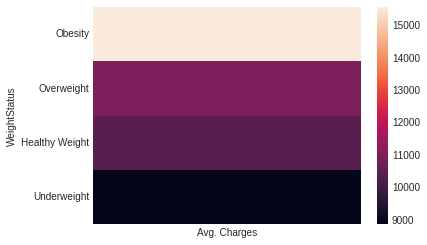

In [30]:
sns.heatmap(frame)

**Observation**
* Southeast has `243` Obesity People max region
* northeast has `73` Healthy Weight max
* Smoking doesn't affect in weight status
* Obesity People Pay Max charges that other poeple

-----
<h3>Sex</h3>

<AxesSubplot:xlabel='sex', ylabel='count'>

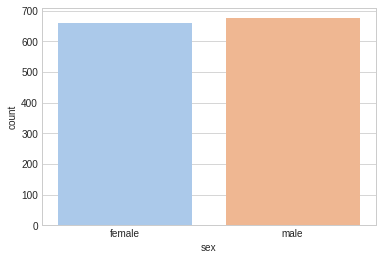

In [31]:
sns.countplot(x = data['sex'])

<AxesSubplot:xlabel='sex', ylabel='count'>

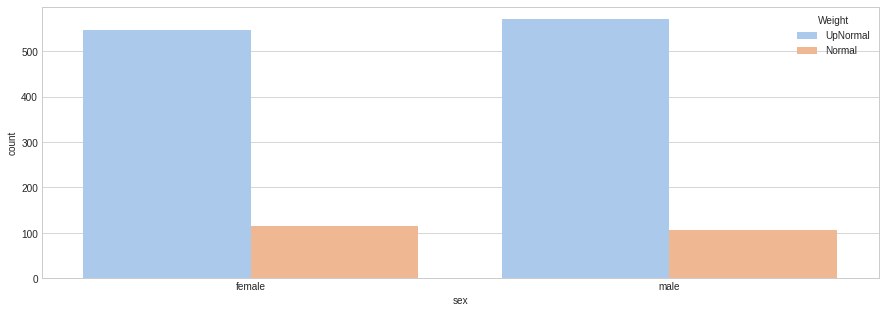

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(x = data['sex'], hue = data['Weight'])

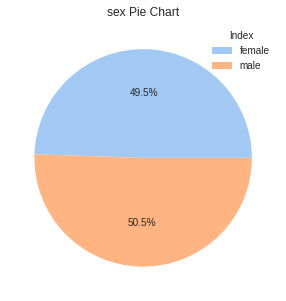

In [33]:
pie(x = 'sex')

**Observation**
* Data set is evenly distributed among Male and Female with `49.5%` **Female** and `50.5%` **Male**

-----
<h3>Smoker</h3>

<AxesSubplot:xlabel='sex', ylabel='count'>

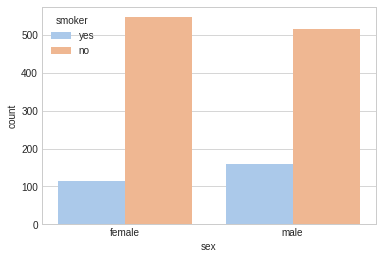

In [34]:
sns.countplot(x = data['sex'], hue = data['smoker'])

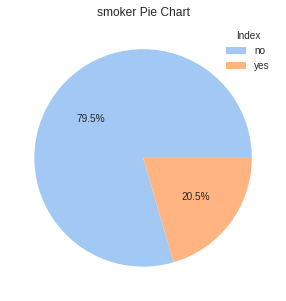

In [35]:
pie('smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

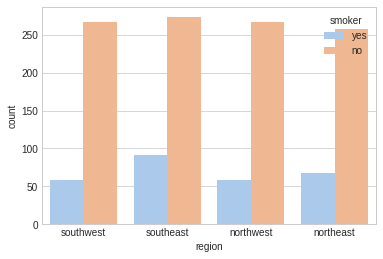

In [36]:
sns.countplot(x = data['region'], hue=data['smoker'])

In [37]:
data['smoker'].groupby(data['region']).count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: smoker, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

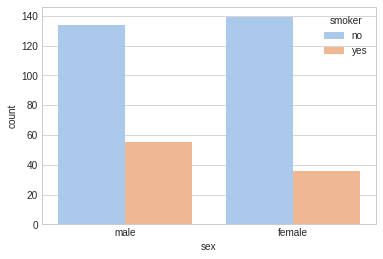

In [38]:
sns.countplot(data = data[data['region'] == 'southeast'], x = 'sex', hue='smoker')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

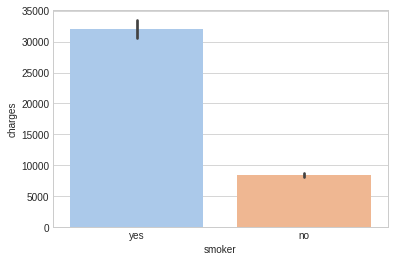

In [39]:
sns.barplot(x = data['smoker'], y = data['charges'], estimator=np.mean)

In [40]:
data.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

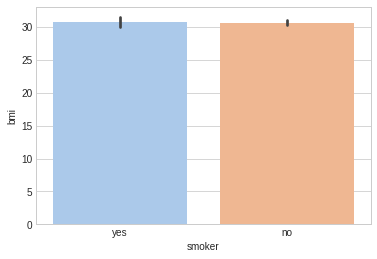

In [41]:
sns.barplot(x = data['smoker'], y = data['bmi'], estimator=np.mean)

In [42]:
data.groupby('smoker').mean()['bmi']

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

**Observation**
* Number of smoker people (`20.5%`) is less than number of non-smoker people (`79.5%`) 
* Southeast contain the largest number of smoker people
* Smoker Peole have alot of charges than non-smoker people
* BMI is not affeceted by smoking

----
<h3>Region</h3>

<AxesSubplot:xlabel='region', ylabel='count'>

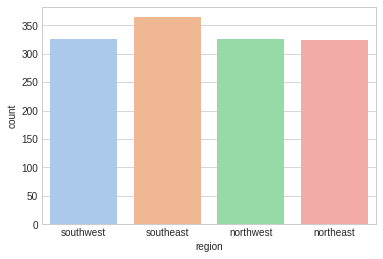

In [43]:
sns.countplot(x = data['region'])

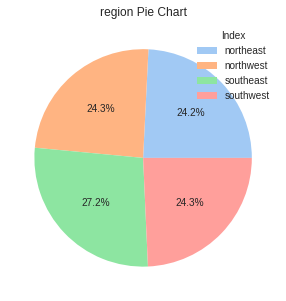

In [44]:
pie('region')

<AxesSubplot:xlabel='region', ylabel='charges'>

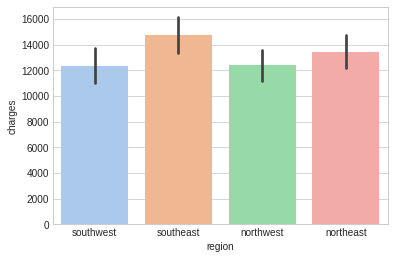

In [45]:
sns.barplot(data = data, x = 'region', y = 'charges')

In [46]:
data['charges'].groupby(data['region']).mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<AxesSubplot:xlabel='region', ylabel='bmi'>

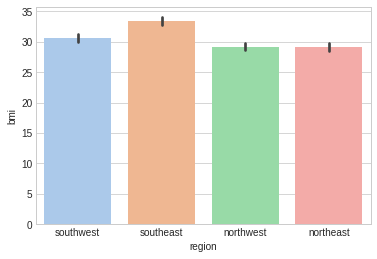

In [47]:
sns.barplot(data = data, x = 'region', y = 'bmi')

In [48]:
frame = data['bmi'].groupby(data['region']).mean().to_frame()
frame

,bmi
region,
northeast,29.173503
northwest,29.199785
southeast,33.355989
southwest,30.596615


<AxesSubplot:ylabel='region'>

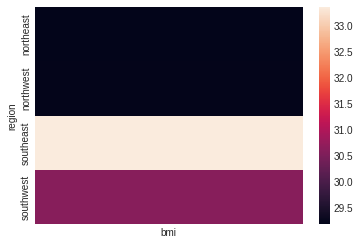

In [49]:
sns.heatmap(frame)

**Observation**
* Data is distributed among 4 Region
* People Live in southeast pay charges larger than the rest of regions `14735.4 $`
* People Live in southeast have the max BMI `33.35`

-----
<h3>Children</h3>

<AxesSubplot:xlabel='children', ylabel='count'>

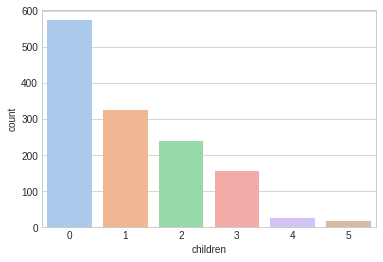

In [50]:
sns.countplot(x = data['children'])

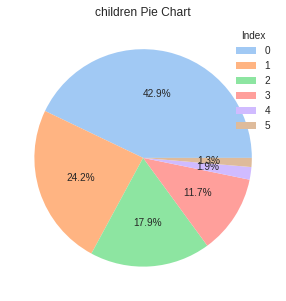

In [51]:
pie('children')

In [52]:
data.groupby('children').count()['age']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

**Observation**
* About `85%` has less than 3 children 

----

<h2>EDA For Numeric Data</h2>

<h3>Age</h3>

In [53]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
0,19,female,27.900,0,yes,southwest,16884.92400,UpNormal,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,UpNormal,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,UpNormal,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,UpNormal,Overweight


In [54]:
summarize('age')

Min Value: 18
Max Value: 64
Q1: 27.0
Q2: 39.0
Q3: 51.0
Mean: 39.20702541106129
STD: 14.049960379216172


<AxesSubplot:xlabel='age'>

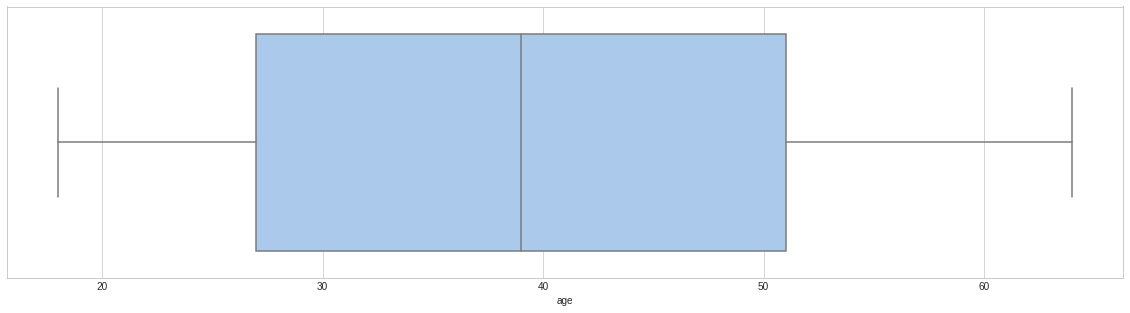

In [55]:
# Let's Check for outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x = data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

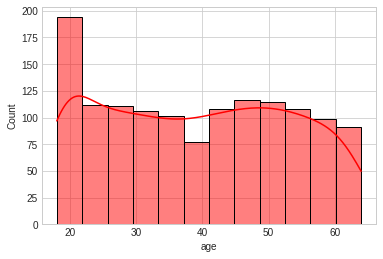

In [56]:
# Let's Check for Age Dist
sns.histplot(x = data['age'], kde = True, color='red')

**Observation**
* There is `no outlier` in Age Feature
* Age Feature is `Uniformly Distributed`
* Has Min value : `18`
* Max Value : `64`
* Median : `39`
* Mean: `39.2 + 14.04 ` OR `39.2 - 14.04`

----
<h3>BMI</h3>

In [57]:
summarize('bmi')

Min Value: 15.96
Max Value: 53.13
Q1: 26.29625
Q2: 30.4
Q3: 34.69375
Mean: 30.663396860986538
STD: 6.098186911679017


<AxesSubplot:xlabel='bmi'>

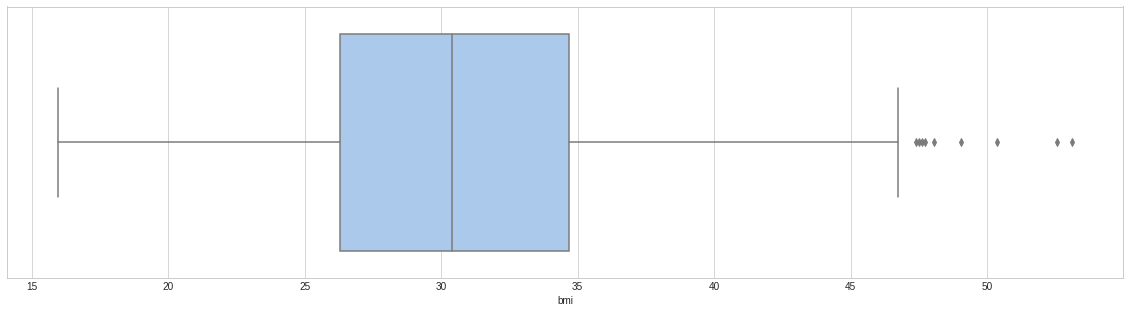

In [58]:
# Let's Check for outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x = data['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

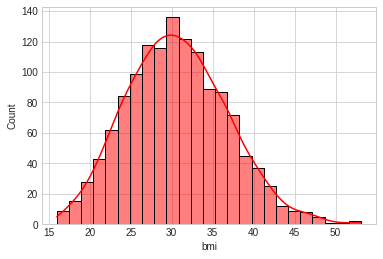

In [59]:
sns.histplot(x = data['bmi'], kde=True, color='red')

In [60]:
# Who is the max BMI ?
data[ data['bmi'] == data['bmi'].max() ]

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
1317,18,male,53.13,0,no,southeast,1163.4627,UpNormal,Obesity


In [61]:
# Who is the min BMI ?
data[ data['bmi'] == data['bmi'].min() ]

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
172,18,male,15.96,0,no,northeast,1694.7964,UpNormal,Underweight


In [62]:
# We will get the mean of Charges to compare with the max BMI
data['charges'].mean()

13270.422265141257

**Observation**
* BMI distribution approximately follow Normal Distribution 
* Max value is `53.13` he is a Male with `18 years old` Live in `Southeast` 
* He is paying `charges` Less than `Average charges` and he is `non-smoker` and we mention that `Smokers pay more charges` and `BMI doesn't affect the charges`

---
<h3>Charges</h3>

In [63]:
summarize('charges')

Min Value: 1121.8739
Max Value: 63770.42801
Q1: 4740.28715
Q2: 9382.033
Q3: 16639.912515
Mean: 13270.422265141257
STD: 12110.011236693994


<AxesSubplot:xlabel='charges'>

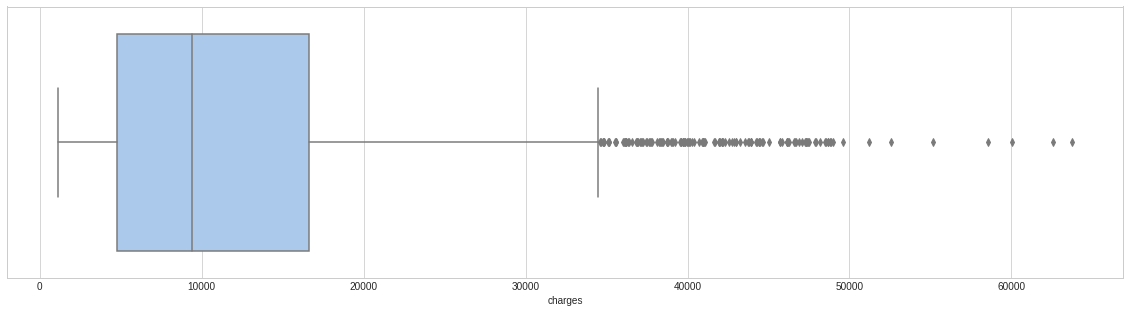

In [64]:
# Let's Check for outliers
plt.figure(figsize=(20, 5))
sns.boxplot(x = data['charges'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

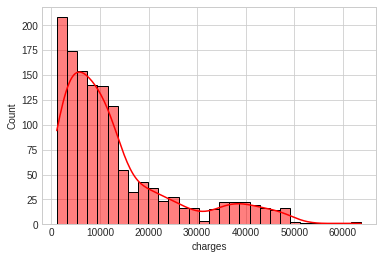

In [65]:
# What is the distribution ?
sns.histplot(x = data['charges'], kde = True, color='red')

In [66]:
# Who Pay More Charges ?!
data[ data['charges'] == data['charges'].max() ]

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
543,54,female,47.41,0,yes,southeast,63770.42801,UpNormal,Obesity


In [67]:
# Who Pay Min Charges ?!
data[ data['charges'] == data['charges'].min() ]

,age,sex,bmi,children,smoker,region,charges,Weight,WeightStatus
940,18,male,23.21,0,no,southeast,1121.8739,Normal,Healthy Weight


**Observation**
* Charges Have alot of outliers
* Charges Distribution Is Skweed to left
* The Person that pay `Max charges is smoker` while Who pay `min charges is non-smoker`

----

Charges VS Age

<AxesSubplot:xlabel='age', ylabel='charges'>

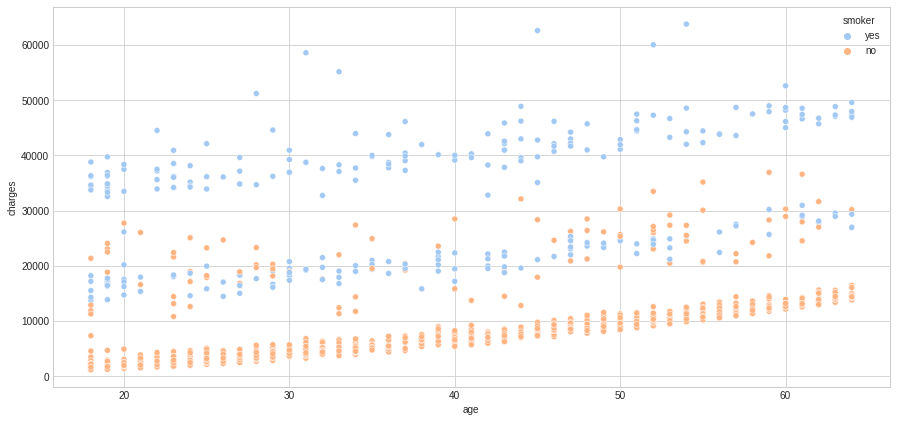

In [73]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = data['age'], y = data['charges'], hue = data['smoker'])

**Observation**
* There is Relation between age and charges we see that increasing in age cause increasing in charges case non-smokers
* But Smokers have charges greater that non-smokers